In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2008_2012.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_36936\3177155401.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

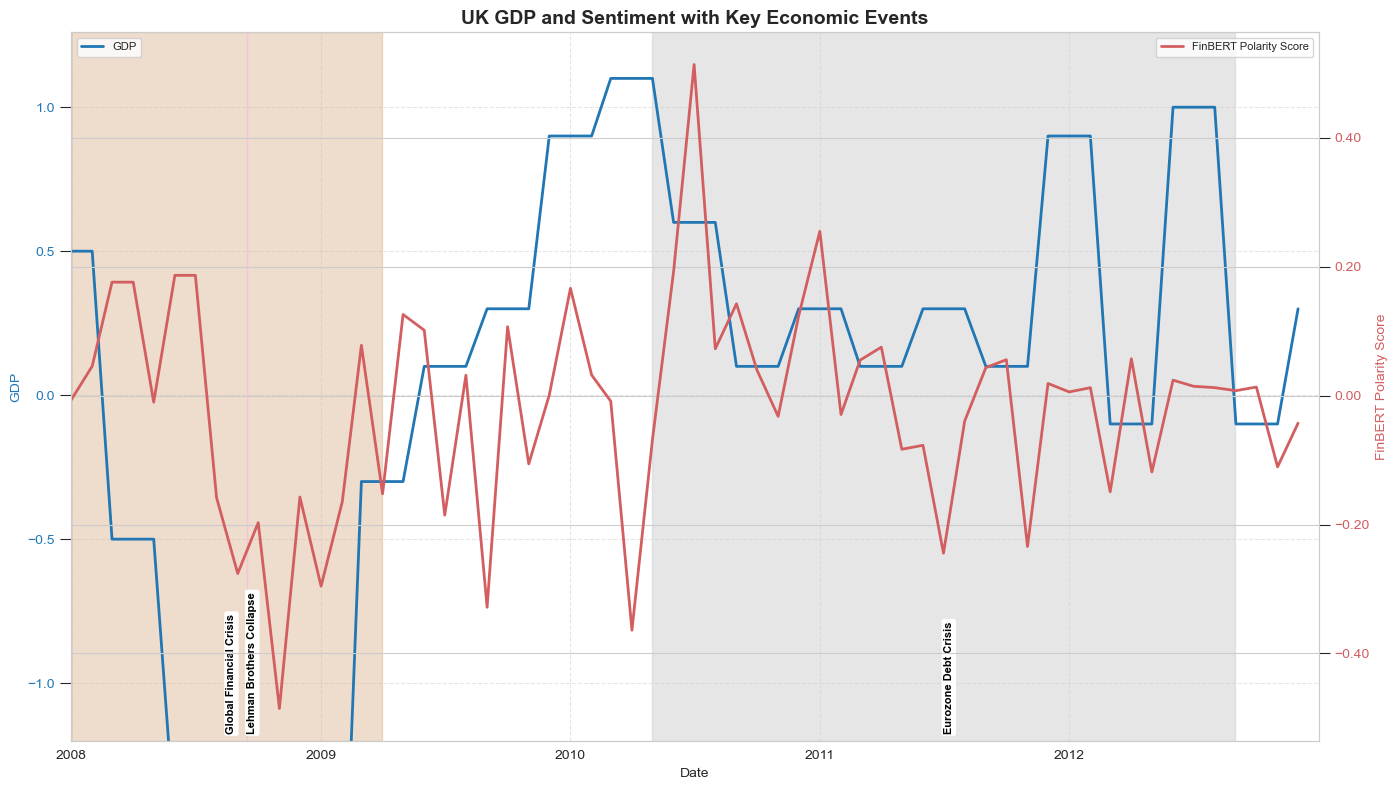

In [6]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['gdp_GDP', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_cpi = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('GDP', color=color_cpi, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['gdp_GDP'], color=color_cpi, label='GDP', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK GDP and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-1.2)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that on zooming in to a tighter timeframe (2008-12) GDP and the finBERT sentiment scores track alongside one another for the financial crisis of 2008, and may be inverse during the Eurozone depth crisis. 

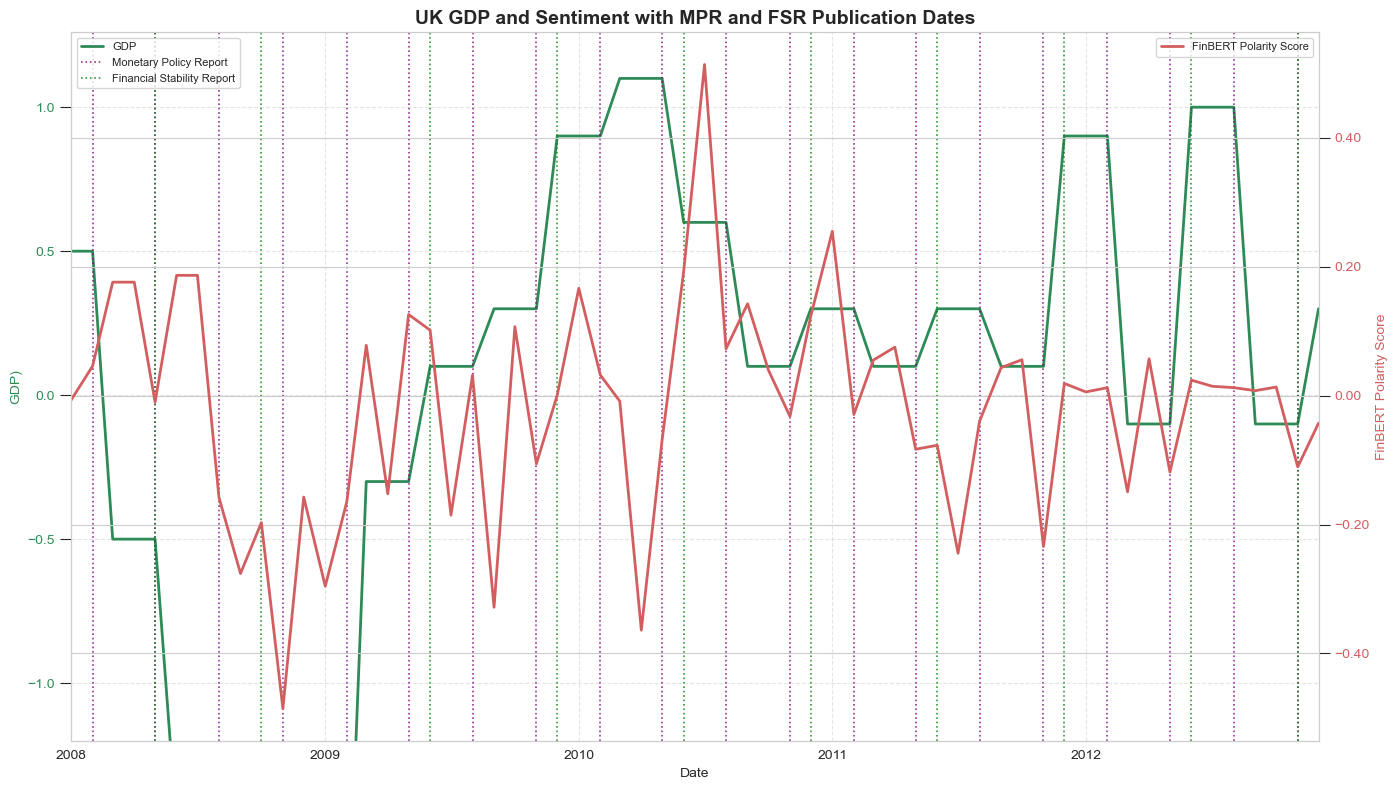

In [8]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['gdp_GDP', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# CPI Line (Left Axis)
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('GDP)', color=color_cpi, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['gdp_GDP'], color=color_cpi, label='GDP', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK GDP and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-1.2)

plt.show()

### Drop unncessary columns to reduce the number of variables to be explored

In [10]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [12]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'BoE_base_rate',
       'CPI_pct_change', '0-2yr_gilts_TReturns', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
       'finbert_sentiment_score'],
      dtype='object')

In [13]:
# Define the new order of the columns
new_column_order = [
    'Date', 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 
    'ftse_250_total_return',  '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,GDP_pct_change,BoE_base_rate,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,ftse_250_total_return,0-2yr_gilts_TReturns
218,2008-01-01,0.5,5.375000,2.2,-0.007201,-13.0,5.2,3.8,5488.98,162.975
219,2008-02-01,0.5,5.250000,2.5,0.045560,-17.0,5.2,3.6,5594.87,163.862
220,2008-03-01,-0.5,5.125000,2.5,0.175849,-19.0,5.3,4.1,5581.66,164.798
221,2008-04-01,-0.5,5.000000,3.0,0.175849,-24.0,5.2,4.6,5679.93,164.468
222,2008-05-01,-0.5,4.916667,3.3,-0.010290,-29.0,5.4,4.7,5657.73,164.014


# Correlation analysis

### Create pairplot for visual correlation analysis

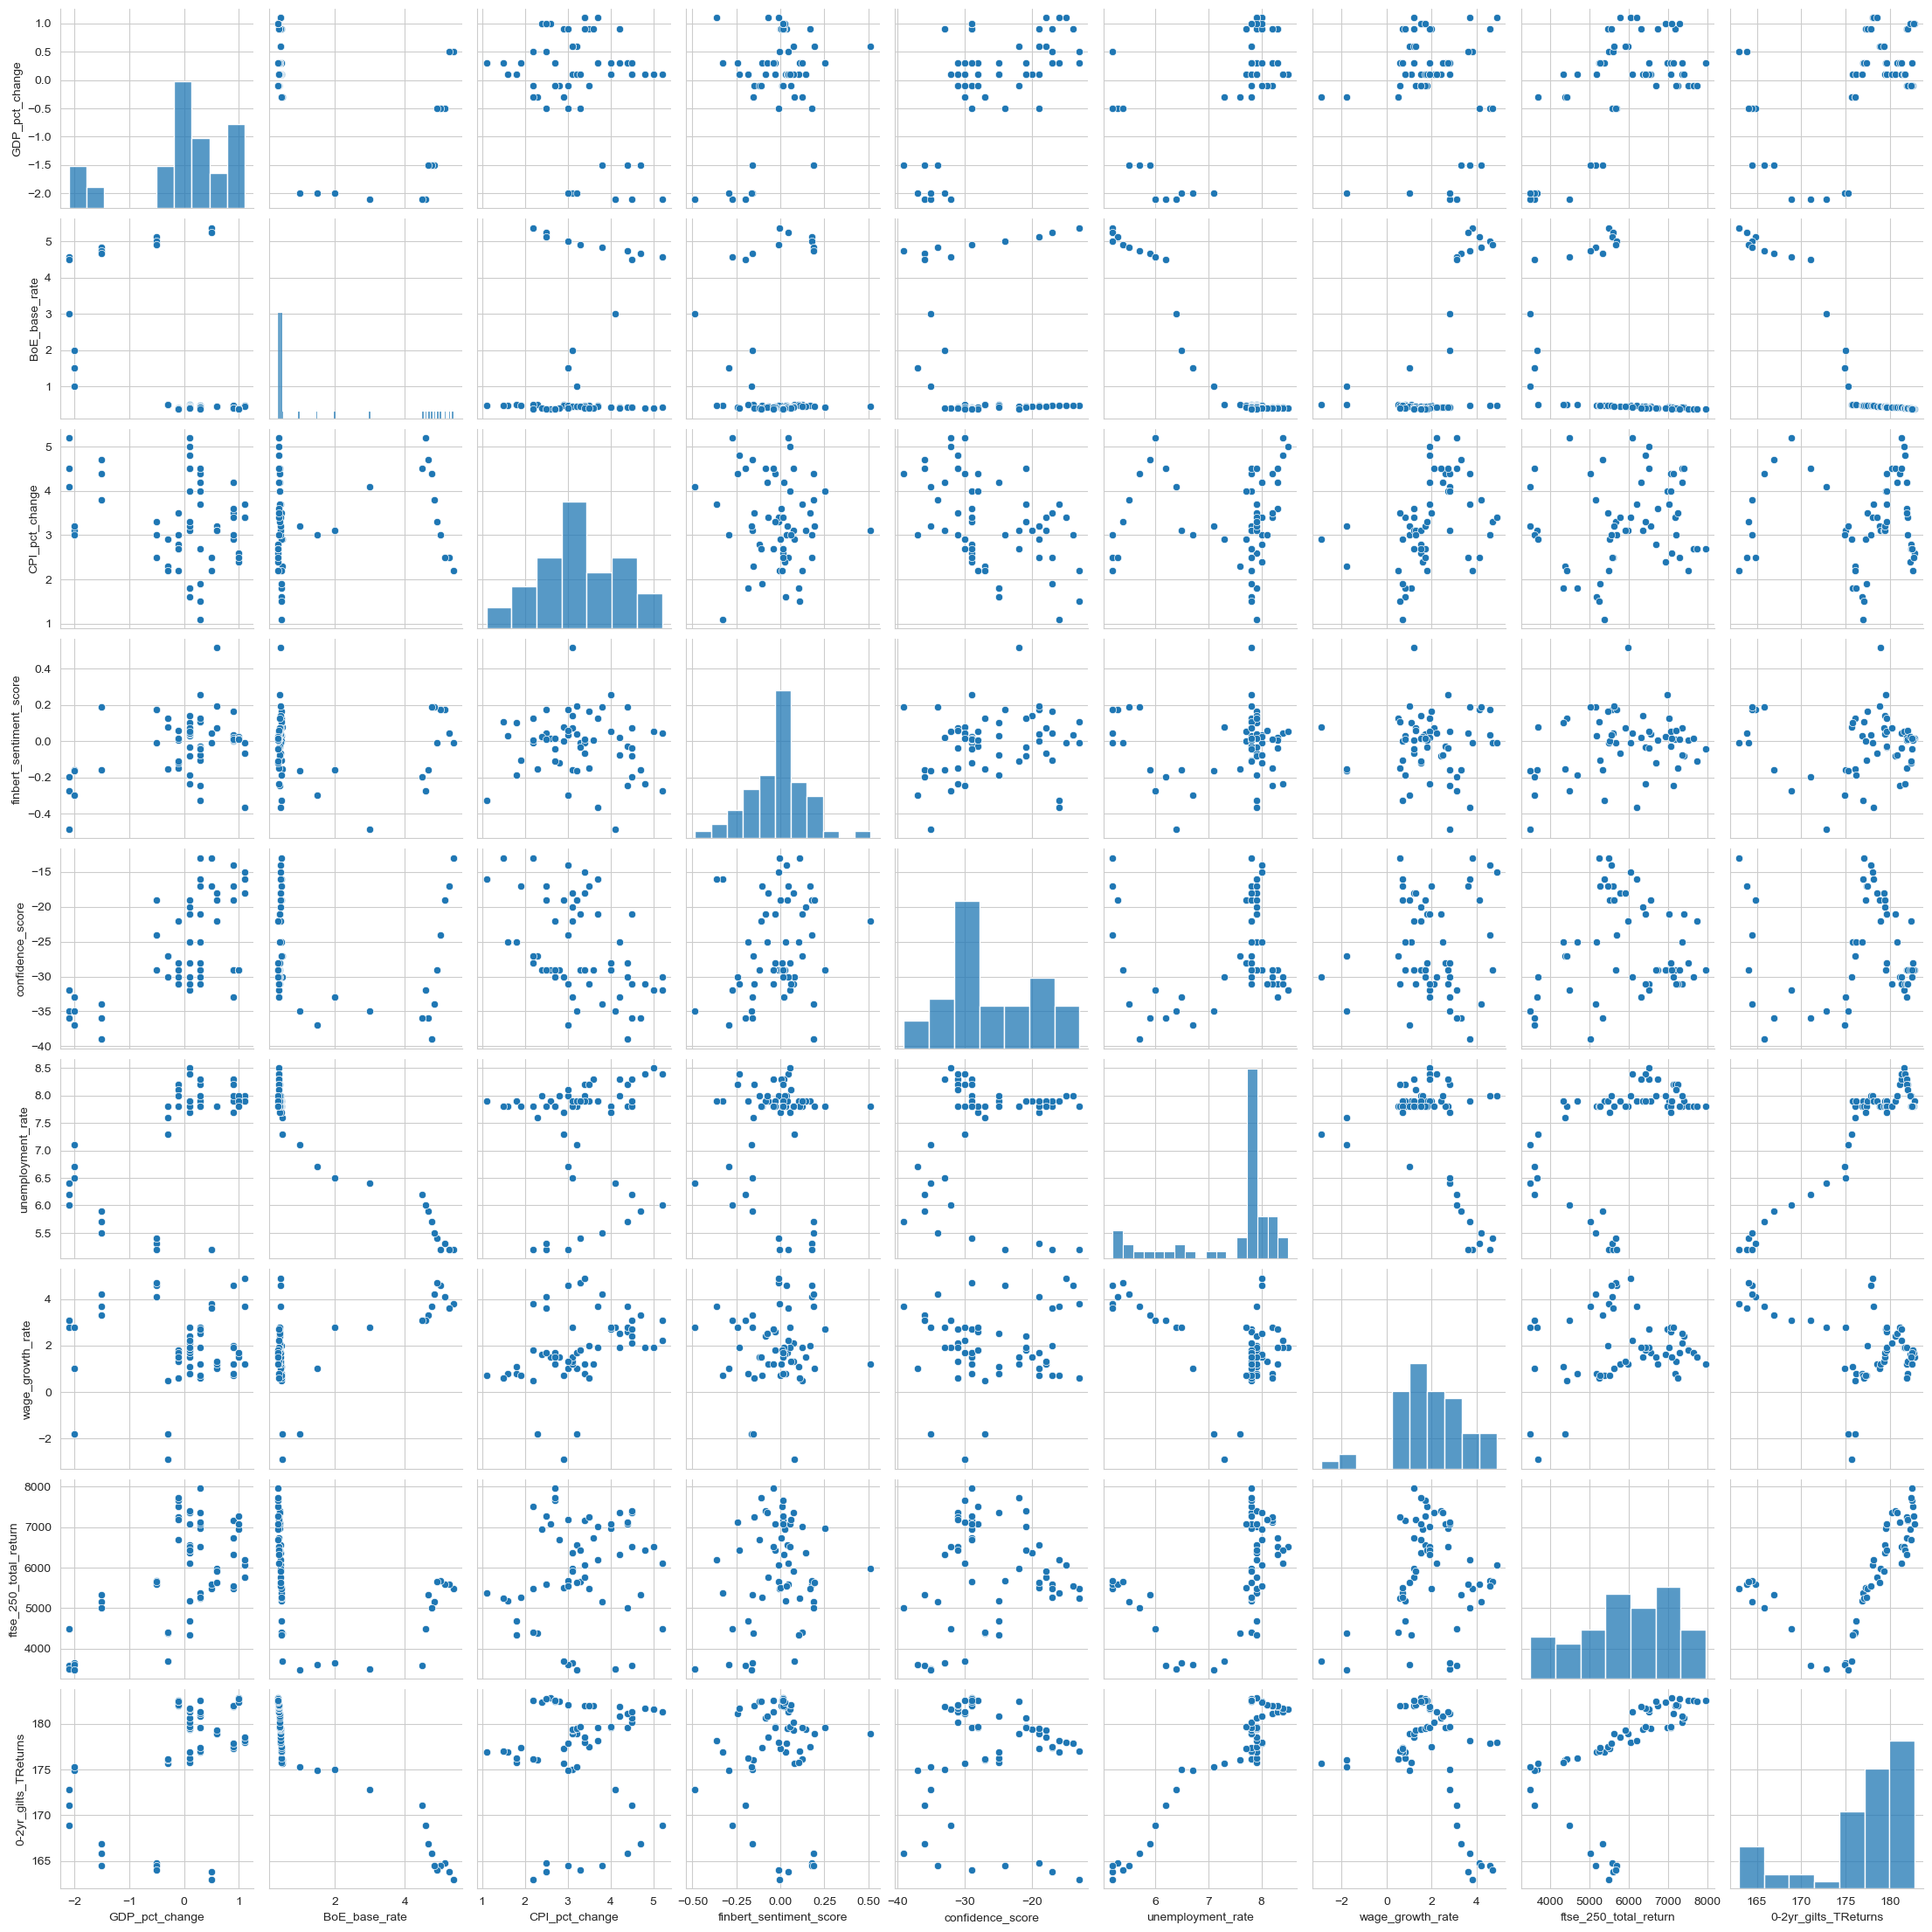

In [16]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

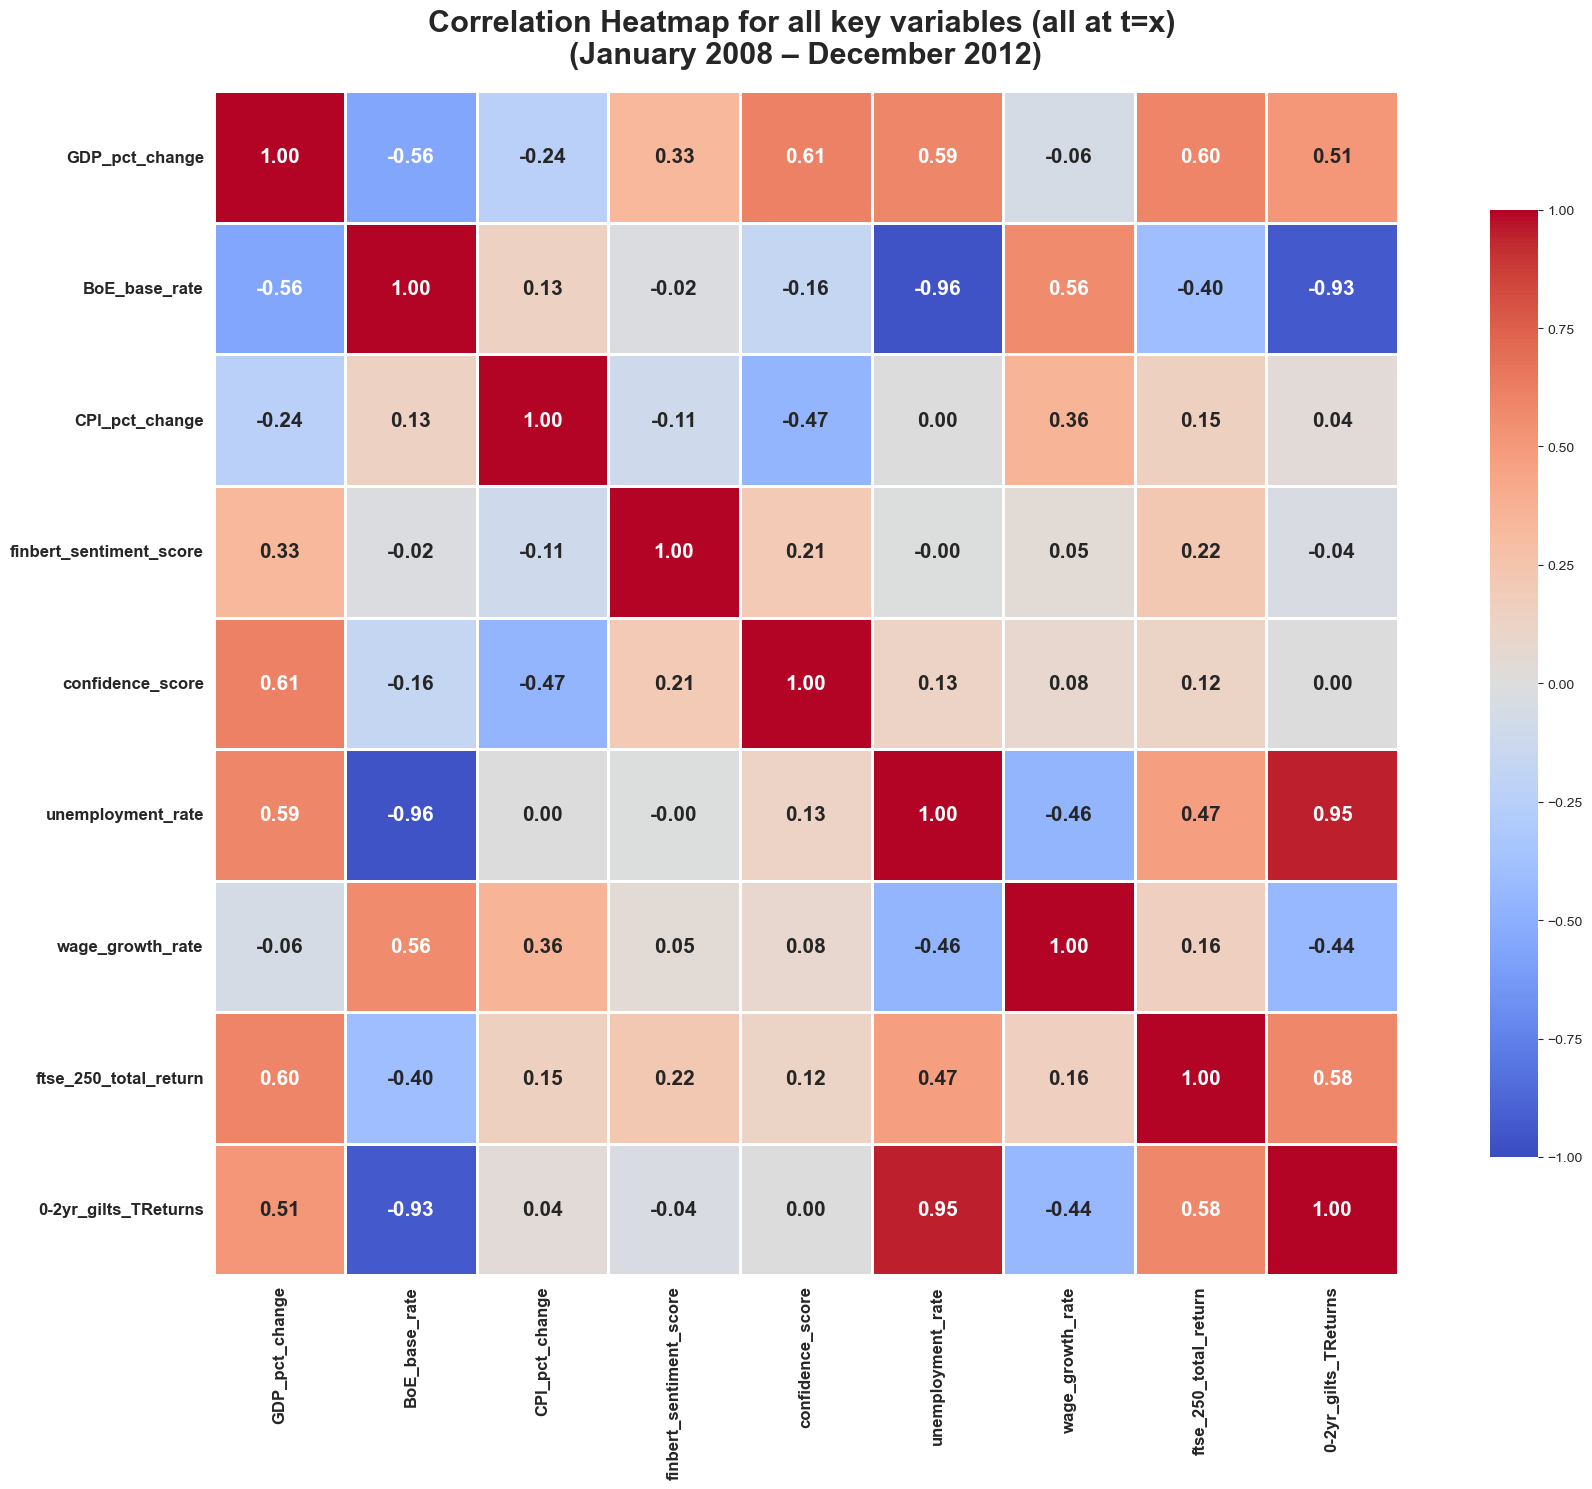

In [18]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2008 – December 2012)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

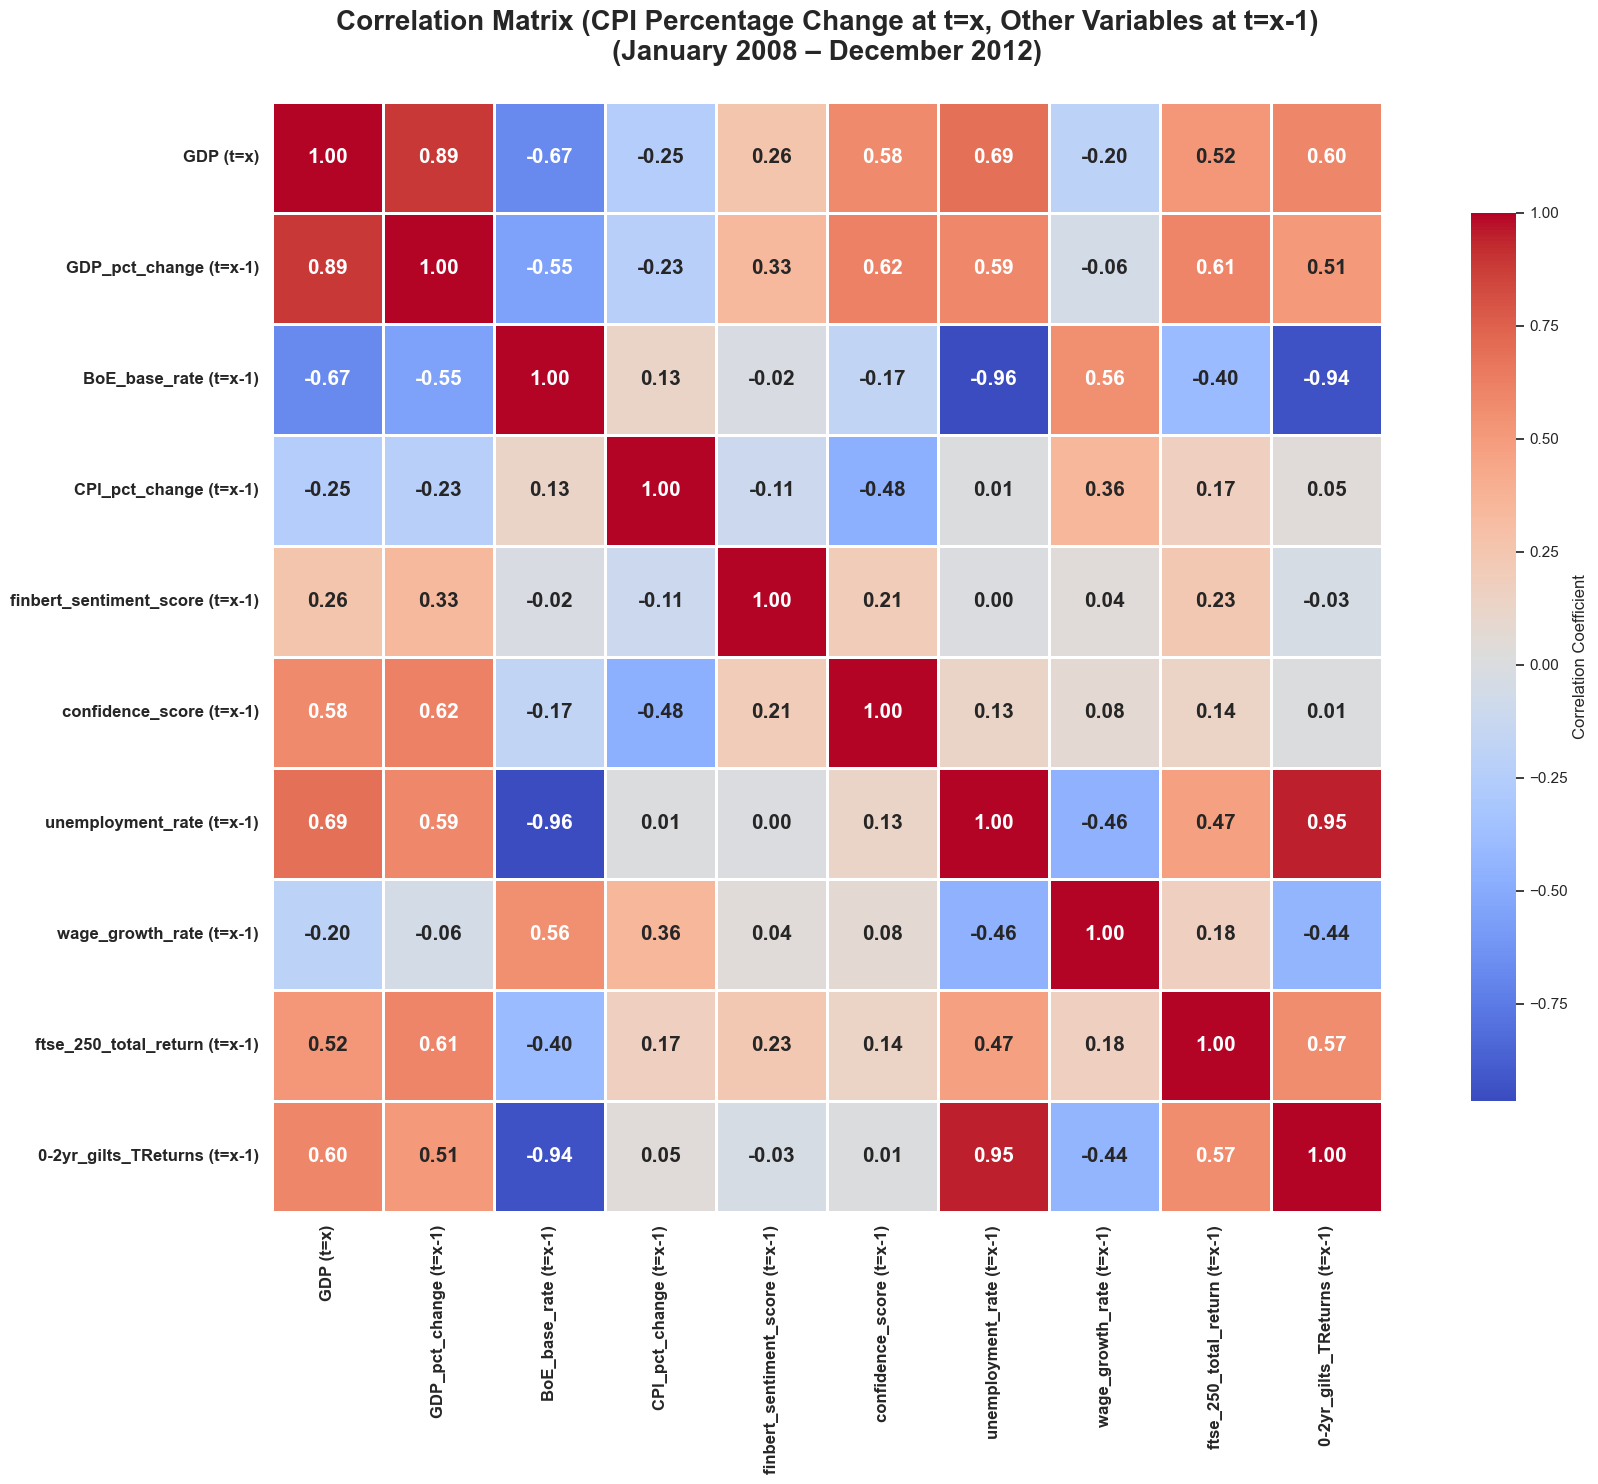

In [19]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change','finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate',
    'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (CPI Percentage Change at t=x, Other Variables at t=x-1)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

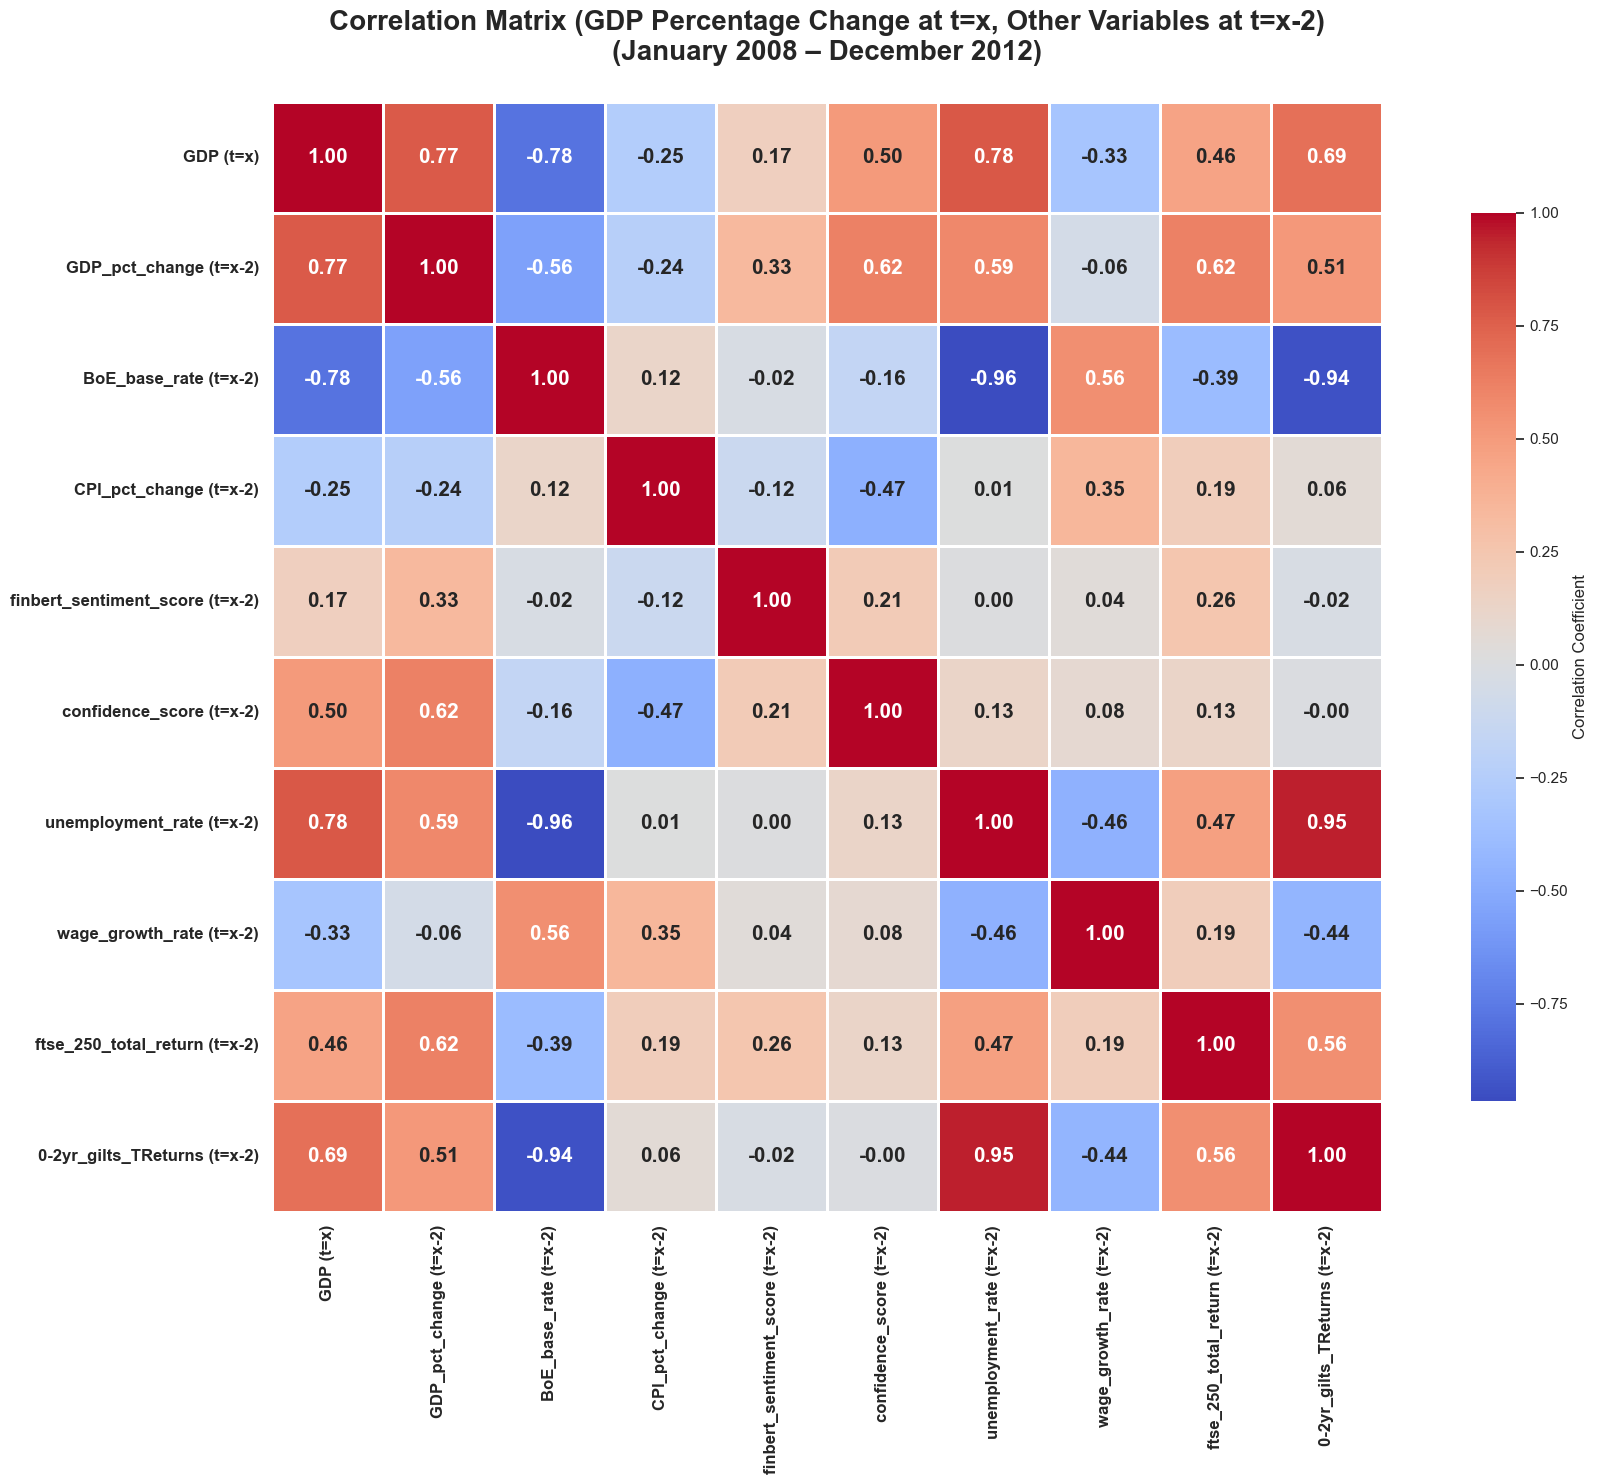

In [20]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 
    'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-2)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

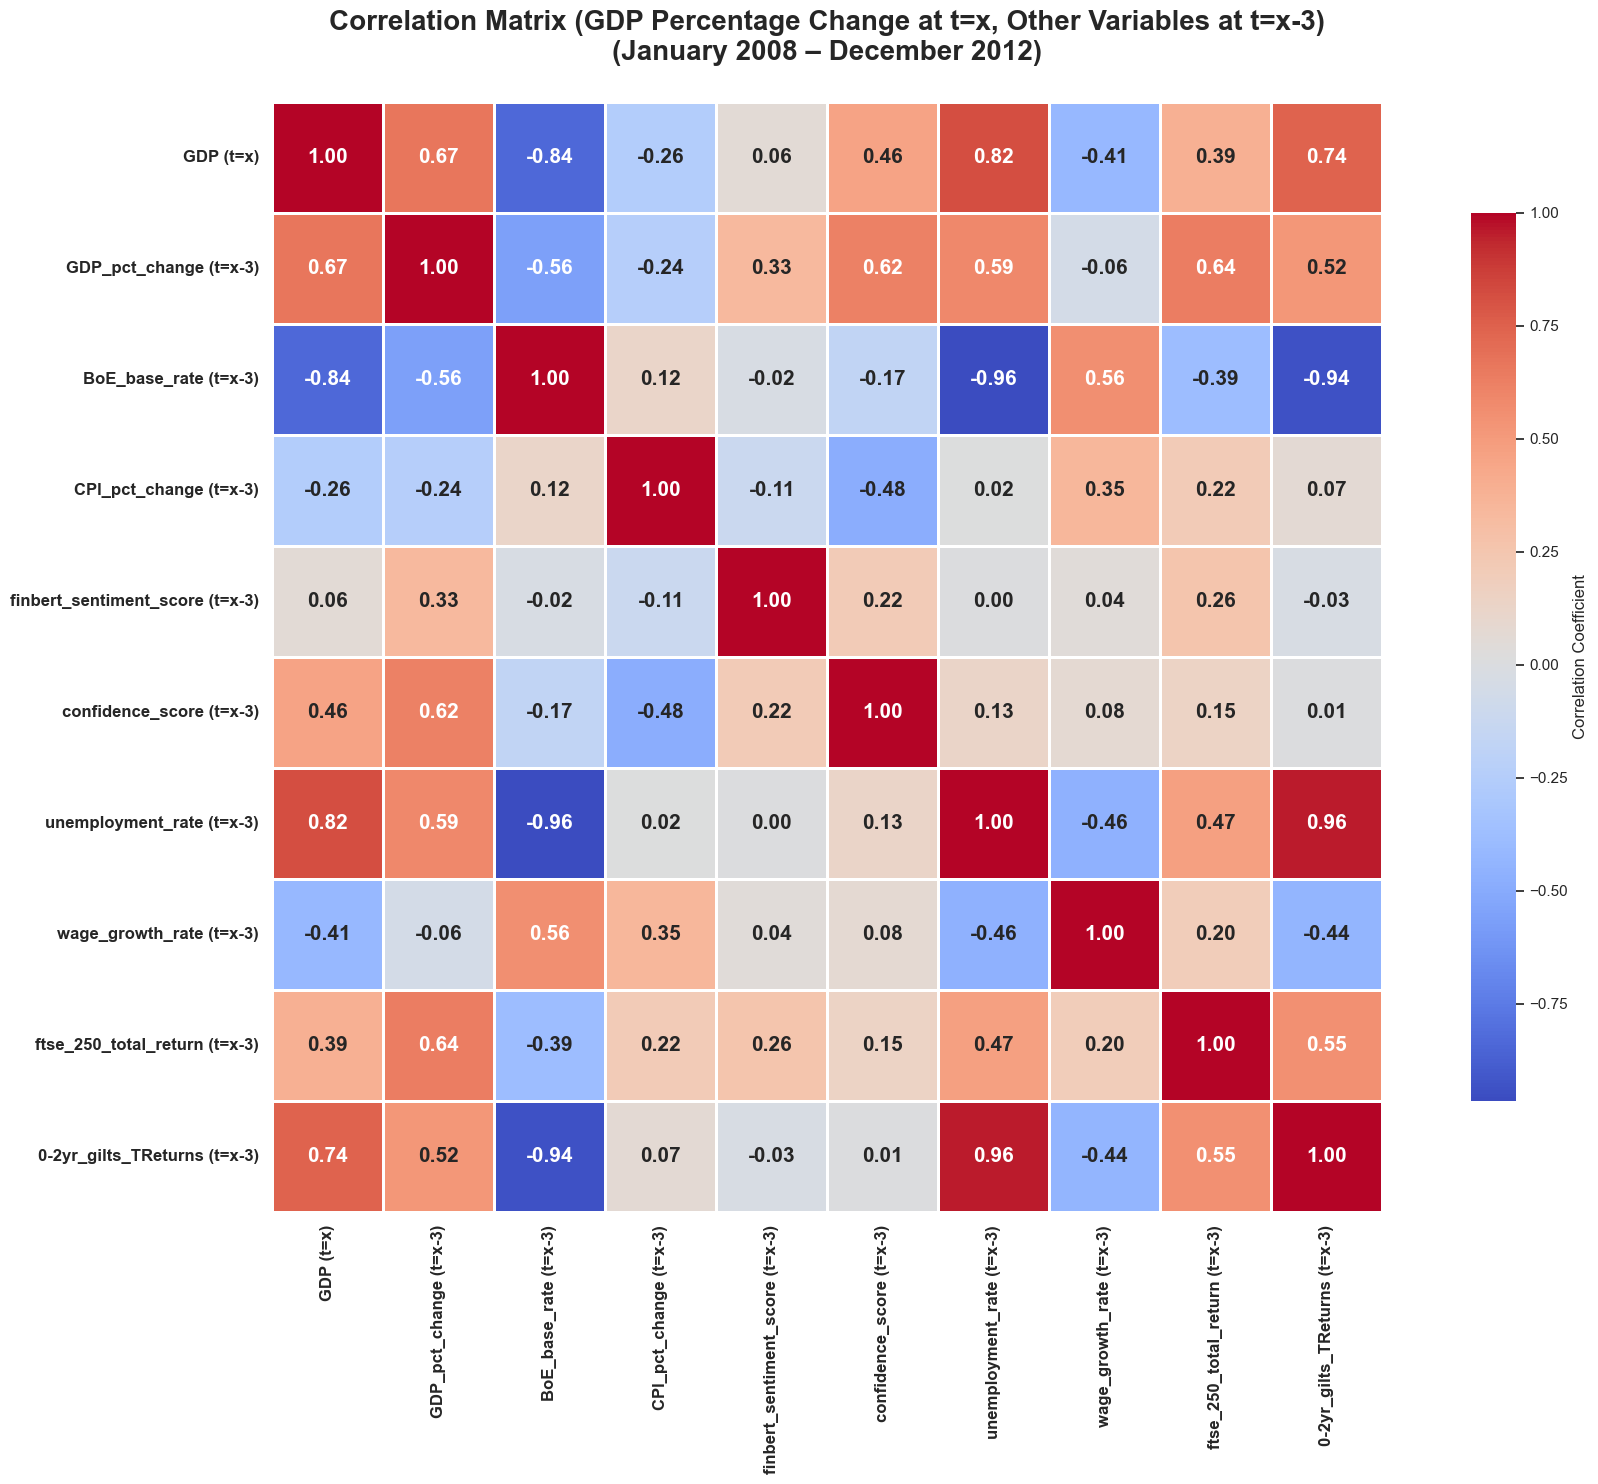

In [21]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'GDP_pct_change', 'BoE_base_rate','CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 
    'ftse_250_total_return', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['GDP_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'GDP_pct_change': 'GDP (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (GDP Percentage Change at t=x, Other Variables at t=x-3)\n(January 2008 – December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### From the above matrices, the variables that best correlate with GDP at t=0 are GDP (t-1), BoE_base_rate (t-3), confidence_score (t=0), unemployment_rate (t-3),  wage_growth (t-3), ftse_250_total_returns (t=0) and 0-2yr_gilts_TReturns(t-3).

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: GDP vs Lagged GDP, Base Rate, Consumer Confidence Score, Unemployment Rate, Wage Growth, FTSE250 Total and Two Year Gilt Total Returns

### Prepare regression dataframe

In [138]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['GDP_pct_change (t=x)'] = filtered_df['GDP_pct_change']
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['CPI_pct_change (t=x-1)'] = filtered_df['CPI_pct_change'].shift(1)
regression_df['ftse_250_total_return (t=x-1)'] = filtered_df['ftse_250_total_return'].shift(1)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1),CPI_pct_change (t=x-1),ftse_250_total_return (t=x-1)
GDP_pct_change (t=x),1.000000,0.885611,-0.673217,0.584731,-0.249572,0.521953
GDP_pct_change (t=x-1),0.885611,1.000000,-0.554762,0.619097,-0.233537,0.606341
BoE_base_rate (t=x-1),-0.673217,-0.554762,1.000000,-0.169433,0.128606,-0.399148
confidence_score (t=x-1),0.584731,0.619097,-0.169433,1.000000,-0.475304,0.138954
CPI_pct_change (t=x-1),-0.249572,-0.233537,0.128606,-0.475304,1.000000,0.172889
ftse_250_total_return (t=x-1),0.521953,0.606341,-0.399148,0.138954,0.172889,1.000000


In [160]:
# Define the dependent variable
y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [161]:
# Call the predictions for X (array).
mlr.predict(X)

array([-0.10095767, -0.15690522, -0.8060029 , -0.88011367, -0.96182288,
       -1.67192486, -1.75169116, -1.67915882, -1.96257869, -2.02948237,
       -1.77441069, -1.52017315, -1.5187325 , -1.39941271, -0.15400056,
       -0.10005284, -0.10024501,  0.18877702,  0.1886955 ,  0.18724685,
        0.48459967,  0.5456192 ,  0.4709938 ,  0.81639085,  0.85907711,
        0.91452578,  1.02326148,  1.00590825,  0.96654554,  0.63156974,
        0.57287625,  0.65078178,  0.29675327,  0.31683484,  0.27937679,
        0.40733727,  0.25486498,  0.27684494,  0.14890625,  0.09382205,
        0.28760984,  0.3350714 ,  0.24030431,  0.22289193,  0.12133293,
        0.08130439,  0.10005523,  0.56269536,  0.63638122,  0.63501702,
       -0.03300162, -0.03540827,  0.00330719,  0.69432689,  0.69572766,
        0.6953    ,  0.01971264, -0.01582273,  0.13925108])

In [162]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.8439271503794924
Intercept:  0.6831678424370806
Coefficients:


[('GDP_pct_change (t=x-1)', 0.6302590802407175),
 ('BoE_base_rate (t=x-1)', -0.1586111488131978),
 ('confidence_score (t=x-1)', 0.019342258235635026),
 ('ftse_250_total_return (t=x-1)', -1.4786470314110468e-06),
 ('CPI_pct_change (t=x-1)', 0.005838860668624472)]

85% of the variation in GDP is explained by the predictors. 
Intercept: practically not useful
Coeffecients: 
GDP -1 = strongest postive effect
Base rate -3 = high base rate (three  months ago) reduces GDP
Confidence score = slight association between more confidence and growth in GDP
Unemployment rate -3 = low assiciation betwee low unemployment three months ago and raising GDP
Wage growth -3 = if wages grow three months ago, GDP goes down slightly
FTSE 250 -3 = small increase in FTSE250 give an increase in GDP three months on
0-2 yr gilts -3 = GDP slowing when bond rates raise

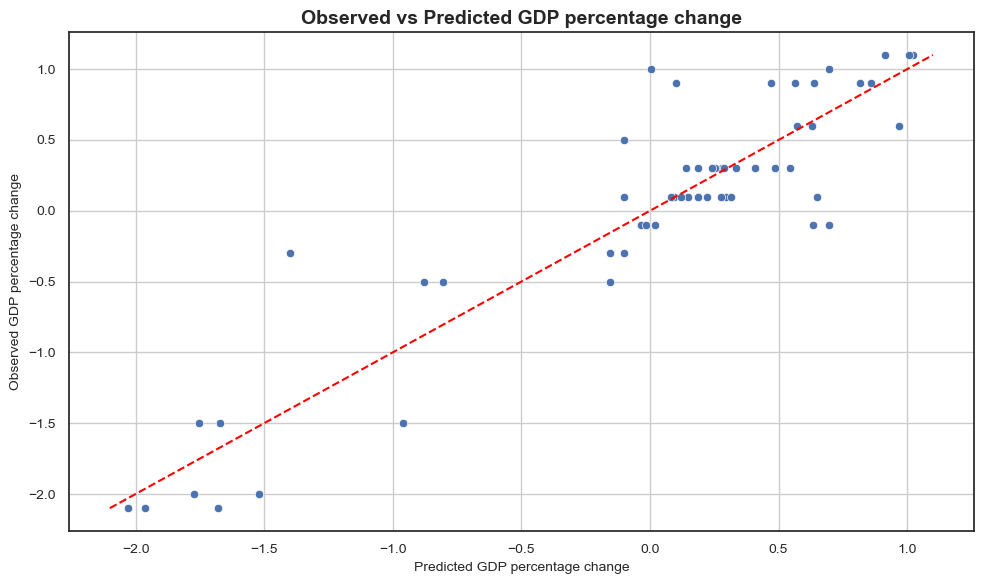

In [164]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### There is a slight fan shape and some of the values suggesting possible Hetrosce
dasticity. Suggests this is a non-linear relationship.

### Training and testing subsets with MLR

In [167]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [168]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.885
Model:                              OLS   Adj. R-squared:                  0.871
Method:                   Least Squares   F-statistic:                     63.01
Date:                  Sun, 18 May 2025   Prob (F-statistic):           3.66e-18
Time:                          22:23:42   Log-Likelihood:                -10.209
No. Observations:                    47   AIC:                             32.42
Df Residuals:                        41   BIC:                             43.52
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

###### <span style="color: orange;"> R-square of 86.6% i.e. when applied to the training data set, 86.5% of the variance in GDP_pct_change (t=0) is explained by the dependent variables. This is a high R-squared value, suggesting a good fit of the model to the data. 

### <span style="color: orange;"> Adj. R-squared of 84% indicates a strong model fit dispite the number of independent variables.

### <span style="color: orange;"> None of the p-values of all coefficients are stisticlly signifigant, other than itself which implies autocorrelation 


### <span style="color: orange;"> Durbin-Watson test score is close to 2, which suggests little to no autocorreleation in the residuals. Although see P-Valies comment above. 

### <span style="color: orange;"> Jarque-Bera (JB) of 0.588 suggest the risiduals are normal. 

### <span style="color: orange;"> Condition number is of 8.48e+05 which is very high, suggesting multicollinearity. To check for multicollinearity measuring the VIF (Variance Inflation Factor) in later steps


In [170]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [171]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 0.28722078  0.60475511 -2.11282452  0.12364057 -1.87001343 -1.11996908
  0.72340839  0.14021538  0.54545621  0.01047687  0.1475121   0.72679135
 -0.1528747  -2.18579373  0.96328726  0.97065003 -0.15291455  0.80178912
  0.28945519  0.04680418  0.3608453  -1.61336885  0.26831382  0.02013055
  0.29909395  0.31031979  0.58365852  0.25800106 -0.38314853  0.44815074
 -1.02245663  0.13525716  0.1471855   0.40374563  0.76379613  0.66301946
 -1.88934     0.39461031  0.13184263  0.14955632  0.40017268 -1.79806574
  0.28420422 -0.20513929  0.92057161  0.00322355  0.17874757]


In [172]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [-0.35352164 -1.81589526  0.25845598 -1.45298305  0.12432417  0.71705102
  0.02725965  0.84208786  0.60148894 -1.57974365  0.6701648  -1.06454039]


In [173]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

64.82076160071163


### <span style="color: orange;"> R-square of 79.31% when the multiple linear regression model based on the training data set is applied to the testing data set. However we know this is only based on lagged GDP (T=-1) and not any of the other features as they did not have a statistically signifigant P values. 

### Check for multicollinearity

In [176]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0        53.1                          const
1         3.9         GDP_pct_change (t=x-1)
2         1.9          BoE_base_rate (t=x-1)
3         2.3       confidence_score (t=x-1)
4         1.9  ftse_250_total_return (t=x-1)
5         1.5         CPI_pct_change (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

### - VIF for everything raises serious concerns for multicolinearity. 

### - VIF Factor of between 2-3 for all the independent variables indicates acceptable levels of multicollinearity and these numbers all far exceed that.

### Check for heteroscedasticity

In [179]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [180]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 4.151429062803674, 'LM Test p-value': 0.5278264173669094, 'F-stat': 0.7944656629245691, 'F-test p-value': 0.5599403856379616}


### The Breusch-Pagan test results show very large p-values (>0.05) for both LM and F statistics, which shows a lack of heteroskedasticity. 

### This means the variance of the residuals is constant, and therefore the standard errors and confidence intervals can be relied upon. 

### Check normality of regression residuals - assumption of MLR

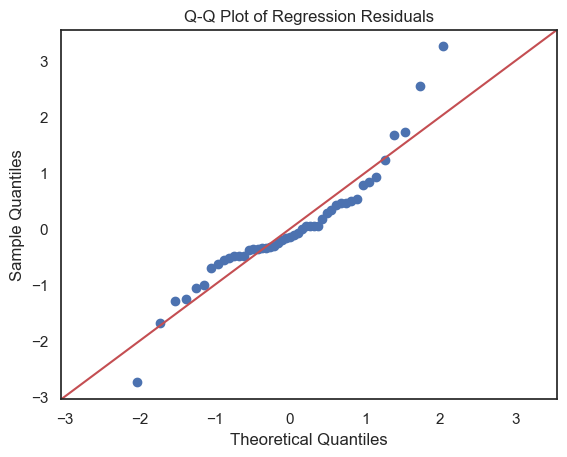

In [183]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### The points dance around the line and do not line up nicely, but they are still close enough to be considered normal. 

### You can see the outliers and the scattering suggest that the model makes a few bigger than expected errors so perhaps not quite normal. 

### But overall, normality seems mostly satisfied.

## Evaluate the model

In [186]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.42582179130893744
Mean Square Error (Final): 0.29169451839386945


### <span style="color: orange;">  On average, the model's predictions for GDP percentage change deviate from the actual values by about 0.307 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.132 percent (MSE) which means the model isn't making huge errors. 

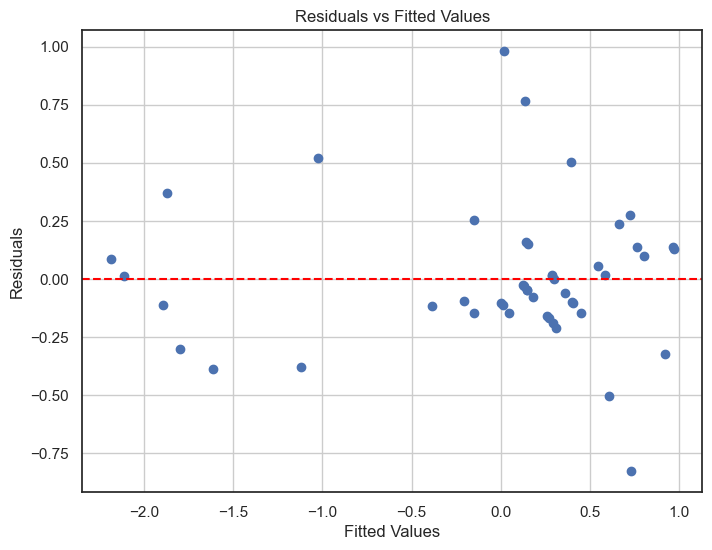

In [188]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

A bit of clustering on the right and some big errors. Not great. 

### This suggests homoscedasticity is present. There is a bit of a cluster on the right side which might mean non-linearity. The big vairance from 0 suggests the model got some things quite wrong. 

## Multiple linear regression: Drop Consumer Confidence, Wage Growth and BoE base rate as variables and explore transformation of dependent variable (if possible)

# Re-perform MLR without BoE base rate, unemployment rate, and 02yr Gilts TR as independent variables. Transformation of dependent variable not straight forward as it contains negative numbers. 

In [197]:
# Define the dependent variable
y = regression_df['GDP_pct_change (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [198]:
# Call the predictions for X (array).
mlr.predict(X)

array([-0.20814659, -0.19076435, -0.91186823, -0.89448599, -0.88289783,
       -1.60979578, -1.59820762, -1.58661946, -2.01812297, -2.00653481,
       -1.79794796, -1.58504144, -1.51551249, -1.44598353, -0.12102819,
       -0.12063758, -0.12024697,  0.17553809,  0.1759287 ,  0.17631931,
        0.32440715,  0.32479776,  0.32518837,  0.76867065,  0.76906126,
        0.76945188,  0.91753971,  0.91793032,  0.91832093,  0.54946849,
        0.5498591 ,  0.55024972,  0.18139727,  0.18178788,  0.1821785 ,
        0.33026633,  0.33065694,  0.33104755,  0.18374094,  0.18413156,
        0.18452217,  0.33261   ,  0.33300061,  0.33339123,  0.18608462,
        0.18647523,  0.18686584,  0.77804534,  0.77843595,  0.77882657,
        0.04073107,  0.04112168,  0.04151229,  0.85423763,  0.85462824,
        0.85501885,  0.04307474,  0.04346535,  0.04385596])

In [199]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.8321123506074982
Intercept:  0.17004659516849555
Coefficients:


[('GDP_pct_change (t=x-1)', 0.7384861118386664),
 ('BoE_base_rate (t=x-1)', -0.13905790546390778)]

Observations: 
- only 6.57% of the variation in GDP change is explained by these variables (R2)
- Wages might have grown too fast as wage increase decreases GDP (which is unusual - although we know it correlates with the 2008 financial crisis where a bubble burst)
- tiny indicator that an increase in FTSE 250 total returns predicts a better GDP but that's very, very small. 

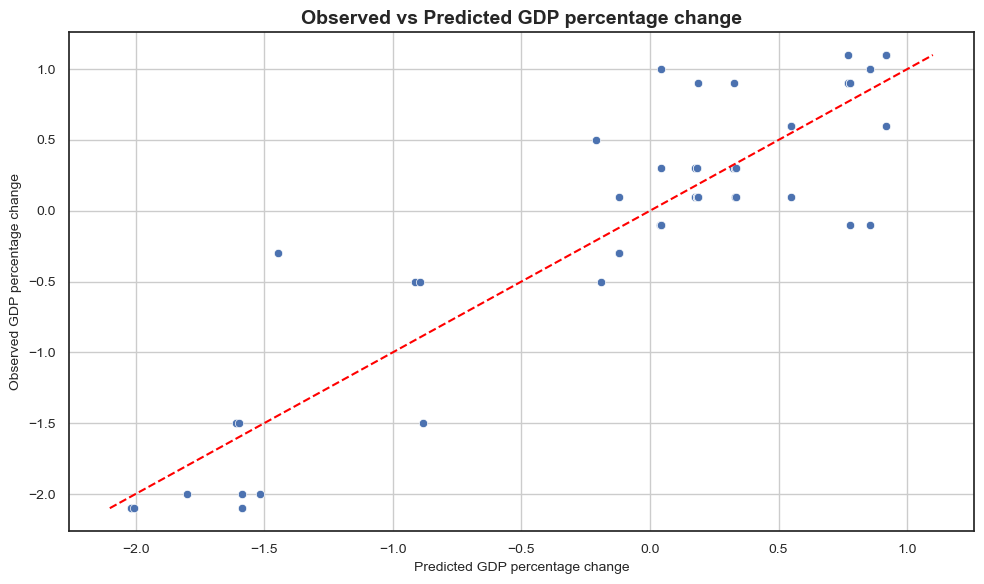

In [201]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['GDP_pct_change (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted GDP percentage change', fontsize=10)
plt.ylabel('Observed GDP percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted GDP percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

Observation: 
- the fit is still there but with the dots not evenly spread there is still some cause for being wary of errors.

### Training and testing subsets with MLR

In [204]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [205]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     GDP_pct_change (t=x)   R-squared:                       0.880
Model:                              OLS   Adj. R-squared:                  0.874
Method:                   Least Squares   F-statistic:                     160.7
Date:                  Sun, 18 May 2025   Prob (F-statistic):           5.98e-21
Time:                          22:24:57   Log-Likelihood:                -11.262
No. Observations:                    47   AIC:                             28.52
Df Residuals:                        44   BIC:                             34.08
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

### This smaller model is still a good fit (71% of variation in GDP can be explained) Adjexted R2 is lower (as less features) but still ok. Model is statisticlly signifigant (F-Stat). 
- All feature show a statisticlly signifigant impact on GDP: Condfidence score is postive, wage increase is negitive and FSTE 250TR is also postivive. 

In [207]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                features
0         2.0                   const
1         1.8  GDP_pct_change (t=x-1)
2         1.8   BoE_base_rate (t=x-1)


### No multicollinearity observed from the VIF output

In [209]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [210]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 0.4268376588056324, 'LM Test p-value': 0.8078177285368553, 'F-stat': 0.2016274614321819, 'F-test p-value': 0.8181503789386101}


### Very large p-value: strong evidence for the null hypothesis of homoskedasticity - i.e. no strong evidence of heteroskedasticity. 

# Note to self: didn't log transform as GDP dataset contains negative numbers

# Given the model output above, multiple linear regression is likely a good ML model to describe inflation. We will explore Random Forest / XGBoost next

In [213]:
regression_df.describe()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1),CPI_pct_change (t=x-1),ftse_250_total_return (t=x-1)
count,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2010-07-01 20:20:20.338983168,-0.027119,-0.023729,1.291849,-25.898305,3.293220,5901.648475
min,2008-02-01 00:00:00,-2.100000,-2.100000,0.376404,-39.000000,1.100000,3487.350000
25%,2009-04-16 00:00:00,-0.200000,-0.200000,0.417135,-31.000000,2.650000,5252.915000
50%,2010-07-01 00:00:00,0.100000,0.100000,0.457865,-28.000000,3.200000,5979.010000
75%,2011-09-16 00:00:00,0.550000,0.550000,0.498596,-19.500000,4.050000,6993.600000
max,2012-12-01 00:00:00,1.100000,1.100000,5.375000,-13.000000,5.200000,7726.080000
std,NaN,0.898817,0.900448,1.698569,6.799328,0.972353,1189.571920


In [214]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 219 to 277
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           59 non-null     datetime64[ns]
 1   GDP_pct_change (t=x)           59 non-null     float64       
 2   GDP_pct_change (t=x-1)         59 non-null     float64       
 3   BoE_base_rate (t=x-1)          59 non-null     float64       
 4   confidence_score (t=x-1)       59 non-null     float64       
 5   CPI_pct_change (t=x-1)         59 non-null     float64       
 6   ftse_250_total_return (t=x-1)  59 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.7 KB


In [215]:
regression_df.head()

,Date,GDP_pct_change (t=x),GDP_pct_change (t=x-1),BoE_base_rate (t=x-1),confidence_score (t=x-1),CPI_pct_change (t=x-1),ftse_250_total_return (t=x-1)
219,2008-02-01,0.5,0.5,5.375000,-13.0,2.2,5488.98
220,2008-03-01,-0.5,0.5,5.250000,-17.0,2.5,5594.87
221,2008-04-01,-0.5,-0.5,5.125000,-19.0,2.5,5581.66
222,2008-05-01,-0.5,-0.5,5.000000,-24.0,3.0,5679.93
223,2008-06-01,-1.5,-0.5,4.916667,-29.0,3.3,5657.73


Root Mean Squared Error: 0.5716
Mean Squared Error: 0.3267
Mean Absolute Error: 0.4388
R² Score: 0.6639


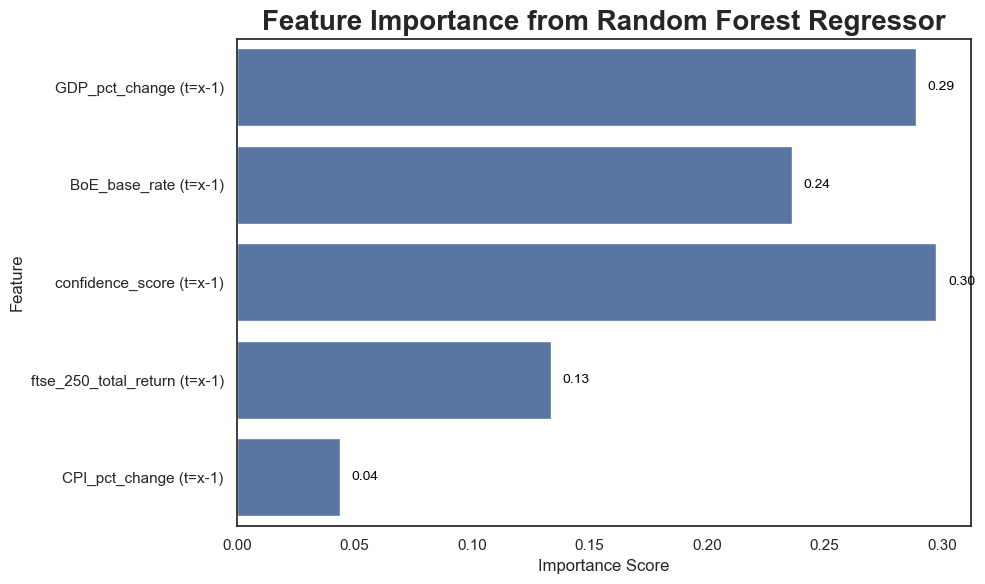

In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'GDP_pct_change (t=x)', 'GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
)


# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
]

y = regression_df['GDP_pct_change (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

Root Mean Squared Error: 0.5042
Mean Squared Error: 0.2543
Mean Absolute Error: 0.3886
R² Score: 0.7384


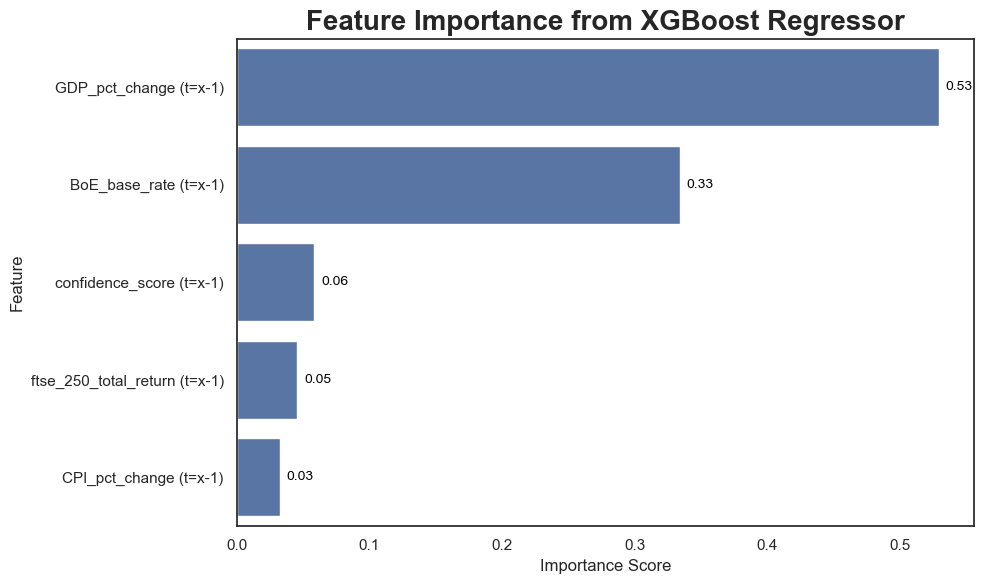

In [221]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(
    subset=[
        'GDP_pct_change (t=x)', 'GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
)


# Define features and target
X = regression_df[
    ['GDP_pct_change (t=x-1)', 'BoE_base_rate (t=x-1)', 'confidence_score (t=x-1)', 'ftse_250_total_return (t=x-1)','CPI_pct_change (t=x-1)']
]

y = regression_df['GDP_pct_change (t=x)']



# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

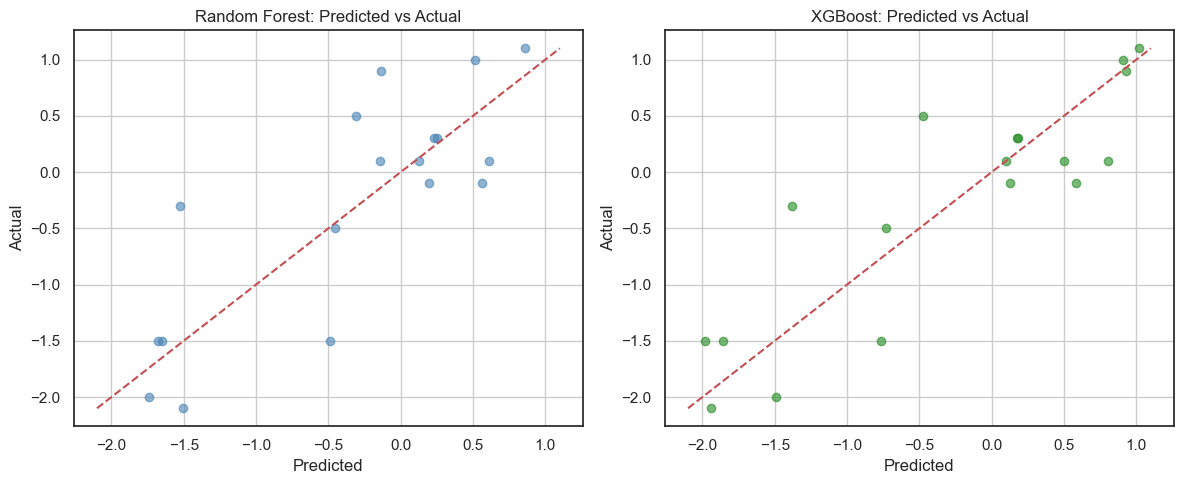

In [223]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models exhibit strong performance in predicting the GDP Percentage Change, with Random Forest slightly outperforming XGBoost across all evaluation metrics. 



The Random Forest model achieved an R² score of 0.8215, a mean absolute error (MAE) of 0.2954, and a mean squared error (MSE) of 0.1625. 

In comparison, XGBoost produced an R² score of 0.7810, MAE of 0.3467, and MSE of 0.1993. 

XGBoost predicted values slightly align more closely with the actual values.

While both models are reliable and capture the underlying patterns well, Random Forest demonstrates slightly greater accuracy and consistency on this dataset.

GDP 2008 - 2013 Overall reflection: 
- Confidence score will predict GDP growth. When people feel good they spend
- Gilts and BoE base rate do influence and this shows that the work of the BoE has an effect on GDP growth. 
- Some small suggestions that unemployment rate and increasing FSTE 250 (equity price) shows a rise in GDP - which is in line with economic theory
- Wage growth is low but this might be because it correlates with inflation. 

As is known this is a non-linear relationship. 
